<a href="https://drive.google.com/file/d/17soL9L7CqMF4sI-pPxCOhN2IqwyoxrhG/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### ***Deep Learining / Speech Recognition***
---
#데이터 전처리, 전이학습, 그리고 CNN을 통한 노인 음성인식률의 향상 방안

### Summary
1. 노인들의 디지털 소외는 이동권과 같은 기본권에도 영향을 미칠 수 있음.
2. 노인들의 디지털 소외 원인 중 하나는 기기 이용방법에 대한 심리적 부담감
3. 음성인식이라는 쉬운 조작법을 통해 기기 이용에 대한 심리적 부담을 줄여 노인의 이동권과 같은 기본권을 보장할 수 있음.
4. 그러나 노인들의 음성 데이터는 부족한 실정으로, 노인 음성인식률은 평균 연령대의 성인 남녀의 음성인식률에 비해 약 20%정도 낮음
5. 데이터 전처리 및 다양한 신경망을 활용하여 노인 음성 데이터를 적게 확보하더라도 높은 예측력을 보이는 모델을 구축할 수 있는지 알아볼 것

# 개요

<img src="https://thumbnews.nateimg.co.kr/view610///news.nateimg.co.kr/orgImg/ae/2020/09/29/ae_1601349605142_335545_0.jpg">

버스 터미널에 하염없이 버스만을 기다리고 있는 어르신을 보신 적이 있나요? 요즘 사람들은 거의 대부분 고속버스를 휴대폰 어플로 예매해서 창구에서 예매하는 사람이 많이 줄었다고 하죠. 때문에 창구의 인원을 줄이고 키오스크로 대체하는 경우가 상당히 많습니다. 그러나 노인들은 어플 사용법을 모르기 때문에 아무리 일찍 오더라도 제 시간에 버스를 타기 쉽지 않죠. 때문에 하염없이 버스터미널에서 시간을 죽이는 노인들이 많다고 합니다.

스마트폰이 보급되며 모든 것이 간편해진 시대가 왔습니다. 전화번호부와 메뉴판 없이도 집에서 배달을 시켜먹을 수 있고, 핸드폰만 있으면 언제건 버스와 기차를 예매할 수 있죠. 하지만 모두가 이런 혜택을 누리는 것은 아닙니다. 디지털 매체에 접근하기 어려운 계층, 소위 디지털 소외계층들에게는 꿈과 같은 이야기입니다. 대표적인 케이스가 바로 위에서 살펴본 노인입니다.

노인들이 디지털 소외계층이 되는 이유는 크게 몇 가지가 있습니다. 가장 큰 원인 중 하나는 디지털 기기에 접근하더라도 그 사용법을 모르는 것입니다.**[1]** 만약 그렇다면, 인공지능 비서가 발달하는 게 해답이 될 수 있지 않을까요?

그러나 현실은 녹록치 않습니다. 수많은 사람들이 인공지능 비서를 이용하지만, 개중 노인 인구는 많지 않습니다. 그 원인 중 하나가 바로 인식률입니다. 노인 음성 데이터셋이 풍부하지 않기 때문에 노인 음성에 특화된 인공지능비서가 많지 않다는 말이죠.. 또한 많은 기존 상업 모델들이 평균적인 성인 남녀 데이터셋에 기반한 모델이기 때문에 노인의 음성인식 정확도는 상대적으로 떨어질 수밖에 없습니다. 

때문에 이번 프로젝트는 일반 데이터셋에 데이터 전처리 과정을 거치고 다양한 모델을 도입하여 노인 음성에 대한 인식률을 높이는 것을 목표로 합니다. 이를 통해 부족한 데이터셋으로도 노인의 음성인식률을 크게 향상시킬 수 있는지를 알아볼 것입니다.

# 선행연구 검토

##청년 남녀 음성과 구분되는 노인 음성의 특징


노년층은 청년층에 비해 혀 움직임의 범위, 지속성, 두께가 감소되기 때문에, 노년층의 발화 스타일은 말소리가 느려지고, 음성 강도가 증가하며, 묵음 구간이 증가하며, 발음의 부정확도가 높다는 특징을 가집니다.**[2]**. 

 음성을 측정하는 기준으로는 지터와 쉼머가 있는데, 지터는 주기간 주파수 변동률, 쉼머는 주기간 진폭 변동률을 의미합니다. 만약 지터와 쉼머가 증가한다면 이는 음의 주파수와 진폭이 일정하지 않으며, 따라서 말이 청자에게 제대로 들리지 않을 수 있다는 것을 의미합니다. 지터의 경우 MDVP에서는 1.04 % 이하 에서 정상적인 음성으로 평가하고, 쉼머의 경우 MDVP에서는 3.81 % 이하일 경우에 정상적인 음성으로 평가합니다. 이를 이용하여 노년층의 음성을 측정한 결과, 지터r과 쉼머의 수치가 노년층에게서 유의미하게 증가하였다는 연구결과가 있습니다.**[3]**
 
또한 노인의 목소리의 측정치에 배음대소음비가 높게 나타나는 것도 특징 중 하나입니다. 음성의 질을 보여주는 지표 중에서 산출된 발성 내의 소음(noise)을 측정한 것이 배음대소음비(harmonic-to-noise ratio; HNR)입니다. 소음은 발성 도중 성대에서 산출되는 거친 기류로 인해 발생하게 되는데, 성대의 조절이 어려워지거나 성대 사이에 기류가 새게 되는 틈으로 인해 나타납니다. 이는 거친 음성과 바람 새는 소리, 그리고 목소리 떨림 형태로 나타나게 되는데, 특히 신체적인 상태가 나쁜 경우 이 역시 생리적 영향이 큽니다.**[4]**

또 다른 실험에서는 시각장애, 언어장애 신경 운동 질환 및 성대 질환 경험이 없는 20-30세 남녀 40명과, 65세 이상 남녀 40명 총 80명의 2음절-8음절 단어 녹음 데이터를 통해 각 실험군의 발성속도 평균값, 묵음길이 평균값, 지터 평균값, 그리고 음성인식 정확도를 비교하였습니다. 그 결과 발성속도 평균값은 두 집단 모두 청년층에 비해 노년층의 값이 더 높은 것으로 나타났으며, 묵음기간 길이의 평균값 차이는 여성군이 남성군에 비해 두드러졌습니다. 

지터 평균값과 쉼머 평균값의 경우 단어와 발성형태의 문제로 추정되는 원인으로 정상치를 벗어났으나 t-검정 결과 각각 0.003과 0.00000002로 그 차이가 유의미하다고 볼 수 있습니다. 음성인식 정확도의 경우, 남녀 모두 노년층이 청년층에 비해 약 20%정도 음성인식 정확도가 낮은 것을 볼 수 있습니다.**[5]**

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbM5FKE%2Fbtq8qH0tJUj%2FgyFz10wClUhAwYMGG18cR0%2Fimg.png" width="450px"> <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FuK6Rx%2Fbtq8rTlyvLV%2FNs8BvhUNVyRGCyfoBQQV5k%2Fimg.png" width="450px">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbSUMP7%2Fbtq8piGRWmP%2FATqWsOuDl2V8bGZKVpiNNk%2Fimg.png" width="450px">
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbzZP1L%2Fbtq8qJDX2e7%2FnJOk0CkGcVKUgyCq5Yfvk0%2Fimg.png" width="450px">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FrkA7W%2Fbtq8soTbgPG%2FmMhscpEElRp4KEQd9JDs6k%2Fimg.png" width="450px">



21세에서 32세의 남녀 그룹과 66세에서 90세 사이의 남녀 그룹의 음성 데이터셋으로 구성된 <a href="http://www.isphs.org/Phonetician/Phonetician_105_106.pdf">the Hungarian Spoken Language Database</a>를 즉흥적 발화, 기억 말하기, 3명이서 말하기, 234개의 단어로 이루어진 글을 소리내어 읽기와 같은 말하기 분야를 통해 분석한 연구 결과에서는 다음과 같은 측정치가 도출되었습니다.

###Speech rate (syllables/s)

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

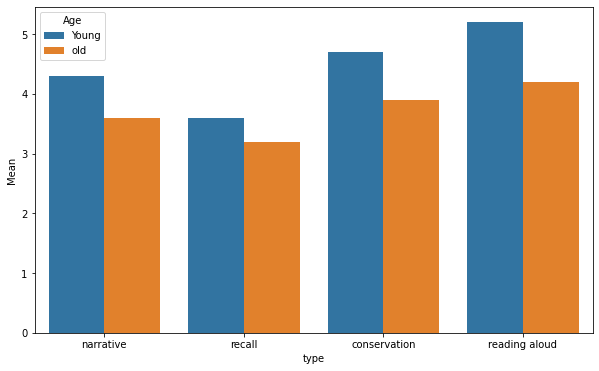

In [ ]:
df_tmp = pd.read_csv("/content/data_1.csv", sep="\t")

plt.figure(figsize=(10, 6));
sns.barplot(data=df_tmp, x='type', y='Mean', hue='Age');

<center> 
Young Speakers 
</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|4.3 (0.6)|3.2–5.3|
|Recall|3.6 (0.7)|2.5–5.2|
|Conversation|4.7 (0.6)|3.7–5.9|
|Reading aloud|5.2 (0.4)|4.4–5.8|

<center>Old Speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|3.6 (0.5)|2.7–4.6|
|Recall|3.2 (0.6)|2.0–4.0|
|Conversation|3.9 (0.5)|2.9–4.7|
|Reading aloud|4.2 (0.5)|3.0–5.0|

###Articulation rate (syllables/s)

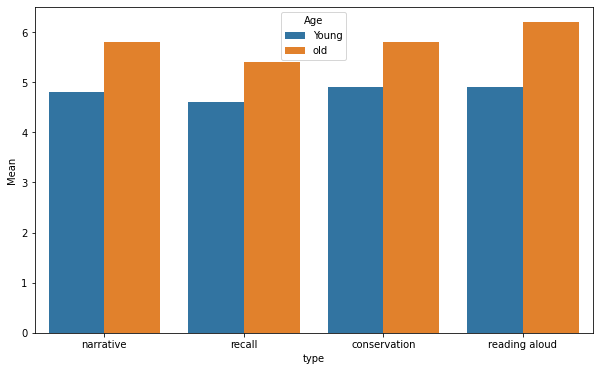

In [ ]:
df_tmp = pd.read_csv("/content/data_2.csv", sep=",")

plt.figure(figsize=(10, 6));
sns.barplot(data=df_tmp, x='type', y='Mean', hue='Age');


<center>Young speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|5.8 (0.6)|4.9–6.9|
|Recall|5.4 (0.7)|4.3–6.8|
|Conversation|5.8 (0.6)|4.6–7.0|
|Reading aloud|6.2 (0.4)|5.2–6.7|

<center>Old speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|4.8 (0.4)|4.0–5.6|
|Recall|4.6 (0.5)|3.5–5.4|
|Conversation|4.9 (0.5)|4.0–5.6|
|Reading aloud|4.9 (0.5)|3.5–5.6|


### Frequency of pauses (pauses/100 words)


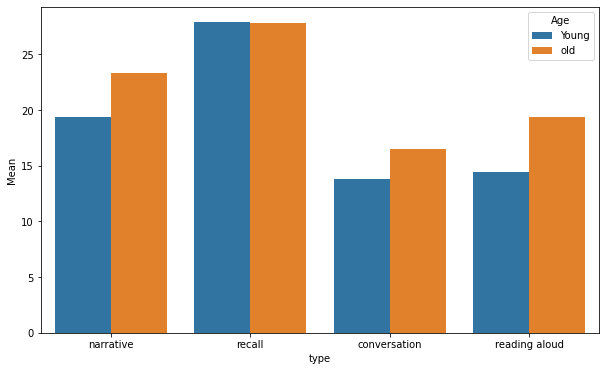

In [ ]:
df_tmp = pd.read_csv("/content/data_3.csv", sep=",")

plt.figure(figsize=(10, 6));
sns.barplot(data=df_tmp, x='type', y='Mean', hue='Age');


<center>Young speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|19.4 (4.7)|13.0–30.2|
|Recall|27.9 (8.3)|17.5–48.9|
|Conversation|13.8 (3.4)|7.4–21.8|
|Reading aloud|14.4 (2.7)|9.8–23.5|

<br>
<center>Old Speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|	23.3 (5.1)|	13.6–31.5|
|Recall|	27.8 (7.3)|16.6–43.3|
|Conversation|	16.5 (3.9)	|12.0–27.7|
|Reading aloud|	19.4 (5.8)	|11.4–32.4|

### Ratio of pauses in the total speech time (%)

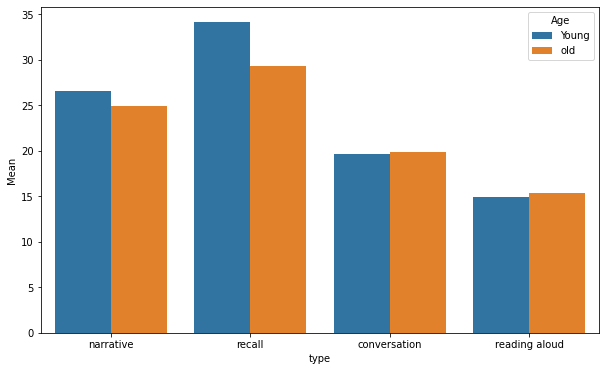

In [ ]:
df_tmp = pd.read_csv("/content/data_4.csv", sep=",")

plt.figure(figsize=(10, 6));
sns.barplot(data=df_tmp, x='type', y='Mean', hue='Age');

<center>Young speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|26.5 (6.7)|	18.0–42.9|
|Recall|34.1 (7.8)|21.5–46.3|
|Conversation|19.6 (5.4)|11.1–29.9|
|Reading aloud|14.9 (2.3)|9.4–18.7|

<br>
<center>Old Speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|24.9 (5.8)|14.9–37.7|
|Recall|29.3 (8.4)|16.9–43.7|
|Conversation|19.8 (5.1)|11.9–30.5|
|Reading aloud|15.4 (3.6)|8.6–23.2|


###Mean duration of pauses (ms)

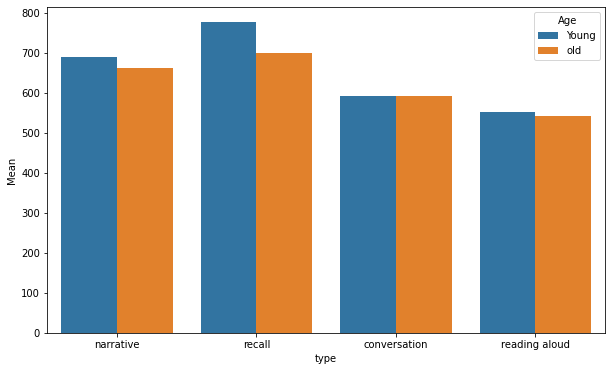

In [ ]:
df_tmp = pd.read_csv("/content/data_5.csv", sep=",")
spk_rt = pd.DataFrame()

plt.figure(figsize=(10, 6));
sns.barplot(data=df_tmp, x='type', y='Mean', hue='Age');

<center>Young speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|	689 (186)|	485–1164|
|Recall|	776 (178)|	461–1189|
|Conversation|	592 (123)|	426–835|
|Reading aloud	|551 (137)|	341–888|

<br>
<center>Old Speakers</center>

|Speech style|Mean (St. dev.)|Min.–max.|
|:---|---:|:---:|
|Narrative|	661 (158)|	468–1124|
|Recall|	700 (190)|	512–1151|
|Conversation	|591 (130)|	387–866|
|Reading aloud	|541 (112)|	384–773|

화자의 나이 변수는 다음과 같은 분야에서 유의미한 관계가 있었습니다:

> (1)
>
>음성률(Speech rate)[F(1, 159) = 61.958; p = 0.001, ∆2 = 0.18]: 모든 음성 스타일에서, 젊은 화자들의 음성률(그리고 글을 소리내어 읽는 것을 제외한 표준 편차)은 늙은 화자들보다 높았습니다. 일원 분산 분석은 서술형[F(1, 39) = 13.973; p = 0.001], 대화형[F(1, 39) = 16.024; p = 0.001], 소리 내어 읽을 때 [F(1, 39) = 60.670; p = 0.001]의 젊은 화자와 노년 화자 사이에 유의한 차이를 보였고, 기억 말하기 분야에서는 두 화자 그룹 사이에서 유의미한 차이가 없었습니다.
>
>(2)
>
>발음률(Articulation rate)[F(1, 159) = 135,485; p = 0.001; ∆2 = 0.471]: 모든 음성 스타일에서 발음 속도(그리고 소리내어 읽는 것을 제외한 표준 편차)가 늙은 화자보다 젊은 화자의 음성에서 더 빨랐습니다. 일원 분산 분석에서, 모든 음성 스타일에서 젊은 화자와 노년 화자 간에 상당한 차이를 보였습니다[narrative: F(1, 39)= 37.461; p < 0.001; recalls: F(1, 39) = 18.878; p < 0.001; conversation: F(1, 39)= 26.207; p < 0.001; reading aloud: F(1, 39) = 70.026; p < 0.001].
>
>(3)
>
>100단어당 일시 정지를 하는 빈도(The frequency of pauses per 100 words)[F(1, 159) = 10.915; p = 0.001, ∆2 = 0.067]: 나이든 화자는 젊은 화자들이 기억 말하기 분야[설명: F(1,39) = p = 0.017; 대화: F(1,9000; p:39; p.39)를 제외한 모든 경우에 더 자주 일시정지를 했습니다.**[6]**

해당 연구를 review한 결과, 노인의 발화 스타일은 젊은 사람의 발화 스타일과 비교했을 때 다음과 같은 특징이 있음을 알 수 있습니다.
- 노년 화자의 말투는 젊은 화자의 말투보다 모든 화법에서 느리다.
- 일시 정지 비율, 일시 정지 빈도, 지속 시간등은 화자의 연령에 반드시 유의미한 영향을 받지는 않는다
- 읽는 중 멈추는 빈도의 경우, 젊은 화자와 늙은 화자는 소리내어 읽는 경우와 멈춤의 빈도에서만 차이가 있음
- 즉, 느린 발음 속도와 같은 몇 변수는 전역적으로 노인층에게 적용되지만, 다른 몇 변수는 특정 발화 상황에서만 젊은 화자들과 구분된다.

두 연구의 결과를 종합하여 볼 때, 노인의 음성은 청년의 음성과 비교하였을 때 다음과 같은 차이를 지닙니다.

1. 노인 화자의 경우 젊은 화자보다 속도가 느린 경향을 보인다.
2. 발음 부정확성의 경우 남성군은 청년과 노년 남성간에 차이가 확연하였으나, 여성군의 경우 추가적인 문헌연구가 필요하다
3. 노인 화자의 경우, 중간중간 일시정지를 하는 빈도가 더 잦았다.
4. 노인 화자의 경우 신체적 문제로 인해 젊은 화자보다 발성 과정에서 발생하는 소음이 많다.

이를 통하여 다음과 같은 데이터 전처리 과정을 통해 일반인의 데이터셋을 노인과 비슷하게 만드는 방법을 고려할 수 있을 것입니다.

1. 발음의 속도를 줄이는 과정
2. 중간중간 묵음을 넣는 과정

또한, 이와 같은 음성학적 차이는 청년 음성 데이터와 노인 음성 데이터의 도메인이 다를 수 있다는 것을 시사합니다. 이를 확인하기 위해선 데이터 시각화를 통해 청년 음성 데이터와 노인 음성 데이터의 분표를 비교해보아야 합니다.

## Voice Recognition Error Rate 향상 사례

### transfer learning과 Fine-Tuning을 통해 해결한 경우 

기존 모델들은 노인, 어린이의 목소리에 대응이 어렵다는 사실에 대한 문제의식은 오래전부터 쭉 있어왔습니다. 이를 해결하기 위한 방법으로 제시된 것 중 하나가 바로 전이학습(Transfer Learning), 그리고 fine-tuning입니다. 

전이학습(transfer learning)이란 어떠한 분야에서 학습된 신경망을 비슷한 방법론을 사용하는 신경망의 학습에 활용하는 것을 의미합니다. 데이터 수가 적을 때에도 효과적으로 활용 가능하며, 기존의 학습을 토대로 학습을 진행하는 것이기 때문에 학습 속도가 빠르다는 장점이 있습니다. 이와 같은 장점으로 인해 어린이 대상 자동음성인식(Automatic Speech Recognition)모델 연구에 주로 사용되고 있습니다.

서울대학교 전기정부공학부의 <노인, 어린이 음성을 대상으로 한 한국어 음성 인식 모델에 관한 연구>가 전이학습과 fine-tuning을 활용하여 모델의 성능을 향상시킨 대표적인 모델입니다. 해당 연구에서는 Trnsformer 기반 자동음성인식 모델을 사용하였고 Connectionist Temporal Classification loss와 attention loss를 multi objective training으로 하는 loss를 사용하였습니다. 또한, 데이터셋은 Baseline으로 활용할 Zeroth 데이터셋, 어린이 데이터셋, 노인 데이터셋 총 세 가지를 사용하였으며 end-to-end speech processing toolkit인 ESPnet 툴킷을 사용하여 실험을 진행하였습니다.**[7]**

실험 결과, 전이학습 방식을 통해 각 데이터셋에 Fine-Tuning한 경우, 일반+어린이 데이터셋 성능은 모델을 처음부터 새로 학습시키는 것과 성능이 비슷하게 나왔고, 일반+노인 데이터셋 성능과 노인+어린이+아이 모델의 성능은 처음부터 새로 학습시키는 것보다 Word Error Rate, Character Error Rate, Sentence Error Rate가 각각 16.7, 16.4, 20.7%, 그리고 18.6%, 17.3%, 24.4% 정도 개선되었습니다.**[8]**

이 방법은 데이터가 적을 때 일반 음성으로 학습한 모델에 노인 음성에 맞게 Fine-Tuning을 거쳐 성능을 높일 수 있다는 점에서 장점이 있습니다. 그러나 Fine-Tuning을 할 데이터가 적고 Domain이 다른 경우(분표가 다른 경우) 학습할 Layer의 양을 정하는 부분에서 Overfitting 혹은 underfitting 문제가 발생할 수 있습니다. 현재 Fine-tuning을 할 데이터가 training 데이터보다 적기 때문에 이 부분을 유의해야 적용해야 할 것입니다.

### CNN을 적용하여 Noisy한 음성 데이터를 처리한 경우

CNN(Convolutional Neural Network)는 데이터와 필터간의 합성곱(Convolution) 연산을 통해 데이터를 필터링하여 Feature를 잘 잡아낼 수 있는 필터 가중치를 찾는 신경망으로 현재 이미지 분야에서 많이 쓰이고 있습니다. 즉, 이미지의 작은 잡음을 CNN을 통해 무시할 수 있다는 말입니다. 그렇다면 음성에 잡음이 많은 경우에도 합성곱 연산을 통해서 이를 해결할 수 있지 않을까요?

실제로 자동음성인식 기술에서 CNN은 노이즈 제거를 위해서 도입되는 모델이기도 합니다.**[9, 10]** 이미 여러 연구 결과를 통해 CNNs가 추가적인 에러율 감소를 보일 수 있다는 것을 확인할 수 있습니다. **[11]** Mitchell McLaren, Yun Lei, Nicolas Scheffer, Luciana Ferrer의 "Application of Convolutional Neural Networks to Speaker Recognition in Noisy Conditions(2014)"이 바로 그 예시중 하나로, Convolutional Neural Network을 자동음성인식에 적용하여 화자 식별(SID) 작업을 수행하도록 하는 논문입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcUS1cn%2Fbtq8wKuDKQd%2FvyMTirbz1pN94R7kOhwtbk%2Fimg.png">

화자 식별의 경우 i-벡터 모델등을 다루지만 화자식별은 여기서 중요한 주제가 아니니 넘어가도록 합시다. 중요한 것은 DNN 대신 CNN을 통해 사후확률추출을 한다는 것입니다. 모델이 돌아가는 과정은 다음과 같습니다. 먼저, 자동음성인식 훈련을 받은 CNN을 통해 모든 프레임의 posteriors를 추출합니다. 다음으로, CNN에서 추출된 posteriors를 사용하여 후속 모델 training을 위해 zeroth와 순서통계량을 추측합니다. 그 결과, 모델은 아무리 노이즈가 많고 주파수가 왜곡되더라도 음성을 더 안정적으로 인식할 수 있게 됩니다.

음성 데이터를 처리할 때 CNN은 음성 feature를 log Mel-filterbank 계수로 받는데요, 이미지를 처리할 때와는 달리, 자동음성인식(ASR)에서는 필터를 전체 프레임의 숫자와 같은 길이로 정의하기 때문에 주파수 축을 따라서 1차원 합성곱 연산이 사용됩니다. 때문에 time domain에서는 시간에 따라 합성곱이 발생하지 않고, 단일 가중 합만이 시간에 걸쳐 수행됩니다. 반면 filter는 필터들의 집합(filter bank)의 숫자보다 훨씬 짧습니다. 이를 통해, CNN은 input 행렬의 여러 행의 가중 합계를 취함으로서 성분이 얻어지는 단일 벡터를 output으로 내보냅니다.**[10]**

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FrkQMh%2Fbtq8uiM78wl%2FM02883kb7xkvK65y2mqJa0%2Fimg.png">

합성곱 층의 출력 벡터 차원은 필터 백터의 수와 합성곱 필터의 높이에 따라 달라집니다. 위의 그림에서는 5개의 프레임에서 7개의 치수 필터 뱅크 feature가 있고, 합성곱 필터의 높이는 2이며 너비는 input에 포함된 프레임 수와 같습니다. 이 결과 합성곱을 통해 6차원의 벡터가 출력됩니다.(여기서 boundary는 무시한다고 가정하겠습니다.)

이후 출력된 벡터는 인접한 n개의 요소에서 최대값을 뽑는 max-pooling 프로세스를 거칩니다. 여기에서 이 프로세스는 겹쳐서 수행할 수도 있고, 겹치지 않고 수행할 수도 있습니다. max-pooling은 인접 필터 뱅크에서 가장 큰 값을 선택하는 프로세스이고 이미 합성곱 필터링을 거쳤기 때문에 이 프로세스는 왜곡을 줄일 수 있습니다. 보통 실제로 적용하는 경우엔 일반적으로 15프레임 컨텍스트의 필터 뱅크를 40개 사용하고, 컨볼루션 필터의 높이는 일반적으로 8로 지정합니다. 또한 데이터를 보다 상세히 모델링하기 위해 많은 컨볼루션 필터를 사용하는 경우가 많습니다. 해당 논문에서는 200개의 컨볼루션 필터를 사용합니다. **[12]**

이와 같이 음성을 통한 화자식별에 CNN을 적용한 결과, 다음과 같은 결과가 도출되었습니다.



<Figure size 432x288 with 0 Axes>

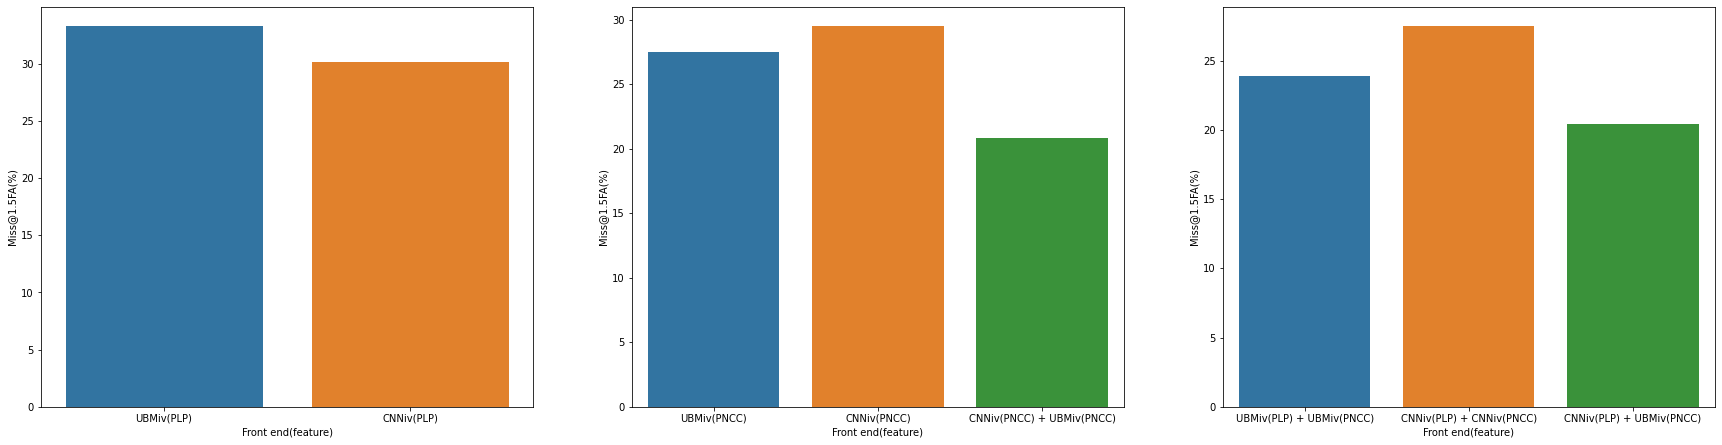

In [ ]:
fed = ['UBMiv(PLP)', 'CNNiv(PLP)']
fed2 = ['UBMiv(PNCC)', 'CNNiv(PNCC)', 'CNNiv(PNCC) + UBMiv(PNCC)' ]
fed3 = ['UBMiv(PLP) + UBMiv(PNCC)', 'CNNiv(PLP) + CNNiv(PNCC)', 'CNNiv(PLP) + UBMiv(PNCC)', ]
missrate = [33.3, 30.2]
missrate2 = [27.5, 29.5,  20.8]
missrate3 = [23.9, 27.5, 20.4] 
EER = [9.4, 8.5]
EER2 = [8.1, 8.5, 6.7]
EER3 = [7.4, 8.1, 6.6]
label = ['Front end(feature)', 'Miss@1.5FA(%)', 'EER(%)']


data_tmp = pd.DataFrame([fed, missrate, EER], index=label).transpose()
data_tmp2 = pd.DataFrame([fed2, missrate2, EER2], index=label).transpose()
data_tmp3 = pd.DataFrame([fed3, missrate3, EER3], index=label).transpose()
fig = plt.figure();
f = plt.figure(figsize=(30,25));
ax = f.add_subplot(331);
sns.barplot(data=data_tmp, x='Front end(feature)', y='Miss@1.5FA(%)');
ax2 = f.add_subplot(332);
sns.barplot(data=data_tmp2, x='Front end(feature)', y='Miss@1.5FA(%)');
ax3 = f.add_subplot(333);
sns.barplot(data=data_tmp3, x='Front end(feature)', y='Miss@1.5FA(%)');

``Table 1: Performance of CNNiv and UBMiv front ends using PNCC and PLP features evaluated on the RATS SID 10s-10s (enroll-test) condition. System fusion is indicated by ‘+’.
``[13]

|Front end(feature) | Miss@1.5FA(%) | EER(%) |
|:-----------|:-------:|:------:|
|UBMiv(PLP) |33.3|9.4|
|UBMiv(PNCC) |27.5|8.1|
|CNNiv(PLP)|30.2|8.5|
CNNiv(PNCC)|29.5|8.5|
||
|UBMiv(PLP) + UBMiv(PNCC) |23.9|7.4| 
|CNNiv(PLP) + CNNiv(PNCC) |27.5|8.1|
|CNNiv(PLP) + UBMiv(PNCC)| 20.4|6.6| 
|CNNiv(PNCC) + UBMiv(PNCC) |20.8|6.7|

결과적으로, UBMiv에 CNN을 조합한 상호보완적 모델은 UBMiv만을 사용한 기존 모델에 비해 약 13%의 오류율을 개선하였습니다. 다시 말해, 이는 음성인식을 통한 화자식별모델에 CNN을 결합한 모델이 기존 모델에 비해 더욱 noise-robust한 모델이라는 것을 의미합니다. 따라서 노인 음성 데이터셋에 대한 기존 모델의 음성인식 정확도 저하에 부정확한 발음이 기여한다면, CNN을 결합한 음성인식 모델을 구축할 시 노인 데이터셋에 대한 음성인식 정확도가 올라갈 것입니다.

### CNN for ASR이 기존 ASR 모델보다 더 높은 성능을 갖는 이유

CNN의 세가지 주요 특성, 즉 지역성, weight sharing, pooling이 모두 음성인식성능을 향상시킬 수 있기 때문입니다.

먼저, 유닛간의 지역성은 일부 대역폭이 다른 대역폭보다 깨끗한 non-white noise에 모델을 더욱 robust하게 만들어줍니다. 지역성이란 인접한 신호들에 대한 상관관계를 비선형 필터를 통해 여러 지역적 특징들을 추출할 수 있는 것을 말하는데, 지역성으로 인해 CNN이 스펙트럼에서 상대적으로 깨끗한 부분에서 좋은 feature들을 학습할 수 있습니다. 이렇게 국소적으로 학습할 수 있는 feature 중 다수의 특성은 소음의 영향을 거의 받지 않습니다. 이는 신경망의 더 높은 레이어가 노이즈를 무시할 수 있게 합니다. 신경망의 상위 레이어가 이러한 소음을 처리할 수 있는 특성을 각 주파수 대역에 대해 조합할 수 있기 때문입니다. 반면 표준 ASR의 경우 하위 레이어의 모든 input 특성들을 학습하기 때문에 노이즈 처리에 더욱 불리합니다. 게다가, 지역성은 학습해야 할 신경망 가중치의 수를 줄여주기도 합니다.

weight sharing의 경우 모델의 noise-robustness를 향상시키고 과적합을 방지합니다. 각 가중치가 한 주파수 대역에서 학습되지 않고 여러 주파수 대역에서 학습되기 때문입니다. 또, 신경망에서 학습해야 할 가중치의 수를 줄여줍니다. 

pooling이란 합성곱 연산을 거쳐 나온 activation map이 있을 때 이를 이루는 convolution layer을 리사이징해서 새로운 층을 얻는 것입니다. 여기에는 activation map에서 pooling의 범위 내에 있는 비슷한 특성 값들 중 최대값을 뽑아내는 max pooling과 평균값을 뽑아내는 average pooling이 있는데요, CNN for ASR에서는 Max pooling을 사용합니다. Max pooling은 풀링 범위 내에 있는 특성값 가운데 최대값을 찾아낸다는 특성상 입력값 패턴에 약간의 차이가 있어도 풀링이 적용되어 추출된 형상의 차이가 최소화된다는 장점이 있습니다. 예를 들어, 아래와 같은 두 벡터가 있고

| | | | | |
|:-:|:-:|:-:|:-:|:-:|
|1|7|3|4|5|

| | | | | |
|:-:|:-:|:-:|:-:|:-:|
|3|7|3|4|5|

pooling size를 2로 할 때, 두 벡터가 pooling된 값은 다음과 같게 됩니다.

| | | | |
|:-:|:-:|:-:|:-:|
|7|7|4|5|

| | | | |
|:-:|:-:|:-:|:-:|
|7|7|4|5|

이와 같은 특성으로 인해 max pooling은 음성에 생긴 작은 변화값에 둔감하고, 이에 따라 CNN은 음성의 큰 특징만을 압축해서 볼 수 있습니다. 

CNN의 이와 같은 특성은 말하는 시간의 차를 다룰 때도 유용합니다. ANN-HM과 같은 모델은 프레임들이 ANN에 의해 동시에 처리되어 화자당 말하는 속도가 차이날 경우 신경망의 성능이 떨어질 수 있는데요, CNN은 Convolution과 max pooling을 통해 화자당 말하는 시간의 차이를 자연스럽게 처리할 수 있습니다.[14]

# 실험 설계

위의 선행연구 분석에서 알 수 있었듯, 노인의 목소리는 배음대소음비가 높아 발성중 소음이 발생하는 경우가 많으며, 말소리가 청년층에 비해 느리며, 더 빈번하게 말을 더듬거나 잠시 침묵하는 등 여러 부분에서 차이가 나는 경향을 보입니다. 따라서 노인의 음성인식률은 이와 같은 domain 차이로 인해 청년의 음성인식률보다 떨어진다는 가설을 세울 수 있습니다. 따라서 이번 실험에서는  아래 table에 서술된 각 모델의 성능을 비교 하고 개중 최적의 모델을 찾아내는 것을 목표로 합니다.

|데이터 전처리|모델|Training 데이터셋|
|:---:|:---:|:--------------:|
|X|BASELINE(RNN)|Baseline|
|O|BASELINE(RNN)|Baseline|
|X| fine-tuning(RNN)|Baseline, Custom|
|O| fine-tuning(RNN)|Baseline, Custom|
|X| fine-tuning(CNN)|Baseline, Custom|
|O| fine-tuning(CNN)|Baseline, Custom|

### 학습 모델

본 실험에서는 실험군으로는 RNN 기반의 Limited Weight Sharing for ASR
 Tranformer 모델**[15]**에 노년층 음성의 데이터셋을 fine-tuning한 모델, 그리고 김연군, 김형진, 이정우의 "노인, 어린이 음성을 대상으로 한 한국어 음성 인식 모델에 관한 연구"에서 사용한 CNN Transformer 기반 ASR 모델에 노년층 음성 데이터셋을 fine-tuning한 모델**[16]**을 각각 전처리를 한 데이터와 하지 않은 데이터로 나누어 학습할 것입니다. 해당 모델의 경우, 매개변수를 학습하기 위한 hidden unit $k, j, m$의 활성함수는 다음과 같은 softmax 함수로 정의합니다.

 $$P(h_{k, j, m} = 1|v) = \frac{exp(I(h_{k, j, m}))}{\sum^p_{n=1}exp(I(h_{k, j, n}))}$$

 여기에서 $I(h_{h, j, m})$은 input layer에서의 $h_{h, j, m}$의 합이며, 다음과 같이 정의됩니다.

 $$I(h_{k, j, m} )= \sum_{i}\sum^f_{n=1}v_i, (k-1)\times s+n+m-1^{w_{k, i, j, n} \; + \; w_{k, i, j, 0}}$$  

또한, 대조군으로는 김연군, 김형진, 이정우의 "노인, 어린이 음성을 대상으로 한 한국어 음성 인식 모델에 관한 연구"에서 사용한 Transformer 기반 ASR 모델에 Baseline 데이터셋만을 학습한 모델을 사용할 것입니다. 

두 모델에서 Loss function은 CTC(Connectionist Temporal Classification) loss[17]와 attention loss를 multi objective training으로 학습하는 hybrid CTC/attention loss로 설정합니다. 

### 데이터셋

본 실험에서 사용할 데이터셋으로는 Baseline, 장년층, 노인 총 세 가지의 데이터셋을 사용할 것입니다. Baseline 데이터셋으로는 한국전자통신연구원에서 구축한 한국어 음성 데이터셋을 사용할 것이며, 해당 데이터셋은 총 1000시간 분량의 자유주제 대화 음성이며 남성 923명, 여성 1077명으로 총 2000명의 발화자들의 낭독형, 자유발화형 음성을 녹음한 것입니다. 본 데이터셋의 특징으로는 음성에 노이즈가 거의 포함되어 있지 않으나 자유발화 데이터셋의 경우 데이터의 특성상 발성의 중첩이 있을 수 있다는 것이 있습니다. 이러한 데이터셋은 음성 인식률을 올리는 연구에 사용되기는 적합할 수 있으나, 청년층과는 다른 특징을 가지는 음성을 인식하는 연구에는 적합하지 않다는 특징이 있습니다. 

장년층 음성 데이터셋은 남성 2명, 여성 1명으로 3명의 화자가 총 1시간동안 자유롭게 발화한 자체 녹음 음성을 사용합니다. 본 데이터셋의 특징으로는 음성에 TV 소리등의 노이즈가 포함되어 있으며, 아이폰 XR을 통해 1m 거리를 두고 녹음였으며 발성이 또렷하게 들린다는 것이 있습니다.

노인 데이터셋은 과학기술정보통신부가 주관하고 한국지능정보사회진흥원이 지원하는 '인공지능 학습용 데이터 구축사업'을 통해 구축된 자유대화 음성(노인남녀) 데이터셋을 사용할 것입니다. 60세 이상의 남녀 노인 1,000명 이상을 대상으로 한 3,000시간 이상의 발화 데이터로 구성된 것으로, 특이사항으로는 해당 데이터셋에서는 사투리와 같은 노인 특유의 억양이 포함되어 있다는 것이 있습니다.

#음성 데이터 시각화

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import audio 
import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import tensorflow_io as tfio
import jamo

In [9]:
ORIGIN_PATH = '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/한국어_음성_분야/'
OLDMAN_PATH = '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/'
TEST_PATH = '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/평가용_데이터/'

In [26]:
audio_train = []
for i in range(1, 5):
    path = ORIGIN_PATH + 'KsponSpeech_0'+ str(i)
    file_list = os.listdir(path)
    for j in path:
        print(h2j(j))

/
c
o
n
t
e
n
t
/
d
r
i
v
e
/
M
y
D
r
i
v
e
/
ᄑ
ᅩ
ᄐ
ᅳ
ᄑ
ᅩ
ᆯ
ᄅ
ᅵ
ᄋ
ᅩ
/
ᄑ
ᅳ
ᄅ
ᅩ
ᄌ
ᅦ
ᆨ
ᄐ
ᅳ
/
P
r
o
j
e
c
t
 
-
 
E
E
V
R
/
C
o
n
t
e
n
t
s
/
ᄒ
ᅡ
ᆫ
ᄀ
ᅮ
ᆨ
ᄋ
ᅥ
_
ᄋ
ᅳ
ᆷ
ᄉ
ᅥ
ᆼ
_
ᄇ
ᅮ
ᆫ
ᄋ
ᅣ
/
K
s
p
o
n
S
p
e
e
c
h
_
0
1
/
c
o
n
t
e
n
t
/
d
r
i
v
e
/
M
y
D
r
i
v
e
/
ᄑ
ᅩ
ᄐ
ᅳ
ᄑ
ᅩ
ᆯ
ᄅ
ᅵ
ᄋ
ᅩ
/
ᄑ
ᅳ
ᄅ
ᅩ
ᄌ
ᅦ
ᆨ
ᄐ
ᅳ
/
P
r
o
j
e
c
t
 
-
 
E
E
V
R
/
C
o
n
t
e
n
t
s
/
ᄒ
ᅡ
ᆫ
ᄀ
ᅮ
ᆨ
ᄋ
ᅥ
_
ᄋ
ᅳ
ᆷ
ᄉ
ᅥ
ᆼ
_
ᄇ
ᅮ
ᆫ
ᄋ
ᅣ
/
K
s
p
o
n
S
p
e
e
c
h
_
0
2
/
c
o
n
t
e
n
t
/
d
r
i
v
e
/
M
y
D
r
i
v
e
/
ᄑ
ᅩ
ᄐ
ᅳ
ᄑ
ᅩ
ᆯ
ᄅ
ᅵ
ᄋ
ᅩ
/
ᄑ
ᅳ
ᄅ
ᅩ
ᄌ
ᅦ
ᆨ
ᄐ
ᅳ
/
P
r
o
j
e
c
t
 
-
 
E
E
V
R
/
C
o
n
t
e
n
t
s
/
ᄒ
ᅡ
ᆫ
ᄀ
ᅮ
ᆨ
ᄋ
ᅥ
_
ᄋ
ᅳ
ᆷ
ᄉ
ᅥ
ᆼ
_
ᄇ
ᅮ
ᆫ
ᄋ
ᅣ
/
K
s
p
o
n
S
p
e
e
c
h
_
0
3
/
c
o
n
t
e
n
t
/
d
r
i
v
e
/
M
y
D
r
i
v
e
/
ᄑ
ᅩ
ᄐ
ᅳ
ᄑ
ᅩ
ᆯ
ᄅ
ᅵ
ᄋ
ᅩ
/
ᄑ
ᅳ
ᄅ
ᅩ
ᄌ
ᅦ
ᆨ
ᄐ
ᅳ
/
P
r
o
j
e
c
t
 
-
 
E
E
V
R
/
C
o
n
t
e
n
t
s
/
ᄒ
ᅡ
ᆫ
ᄀ
ᅮ
ᆨ
ᄋ
ᅥ
_
ᄋ
ᅳ
ᆷ
ᄉ
ᅥ
ᆼ
_
ᄇ
ᅮ
ᆫ
ᄋ
ᅣ
/
K
s
p
o
n
S
p
e
e
c
h
_
0
4


#데이터 전처리

# 모델 구축

###Baseline 평가지표 선정

### 모델 구현

# 모델 평가

# 결론

# Reference

[1] 김명용, 2016; 이강진, 이설희, 2018; 과학기술정보통신부･한국
정보화진흥원, 2019a

[2] William J. Ryan, “Acoustic aspects of the aging voice,” Journal of Gerontology, Vol. 27, No. 2 :pp.265-268, 1972.

[3] Jin S.M, Kwon G.H, Kang H.G. “The steady increase in the age of sound analytical characteristics of the elderly,” Korea Journal of Speech Language 8.1 pp.44-48, 1997.

[4] Gorham-Rowan M. M. & Laures-Gore, J. (2006). "Acoustic-perceptual correlates of voice quality in elderly men and women. Journal of Communication Disorders", 39, 171-184.

[5] 이승준, 권순일 (2014). 노인의 음성인식 성능 개선을 위한 노인음성 분석. 정보과학회지, 32(11), 19p

[6] Judit Bóna. Temporal characteristics of speech: The effect of age and speech style. The Journal of the Acoustical Society of America 136, EL116; https://doi.org/10.1121/1.4885482, 2014.

[7] 김연군, 김형진, 이정우 (2021). 노인, 어린이 음성을 대상으로 한 한국어 음성 인식 모델에 관한 연구. 한국통신학회 학술대회논문집, 608.

[8] 김연군, 김형진, 이정우 (2021). 노인, 어린이 음성을 대상으로 한 한국어 음성 인식 모델에 관한 연구. 한국통신학회 학술대회논문집, 609.

[9] O.Abdel-Hamid,A.-r.Mohamed,H.Jiang,andG.Penn,“Apply- ing convolutional neural networks concepts to hybrid NN-HMM model for speech recognition,” in Proc. IEEE ICASSP, 2012, pp. 4277–4280.

[10] T. N. Sainath, A.-r. Mohamed, B. Kingsbury, and B. Ramabhad- ran, “Deep convolutional neural networks for LVCSR,” in Proc. IEEE ICASSP, 2013, pp. 8614–8618.

[11] Ossama Abdel-Hamid, Abdel-rahman Mohamed, Hui Jiang, Li Deng, Gerald Penn, and Dong Yu. "Convolutional Neural Networks
for Speech Recognition" in Proc.IEEE/ACM TRANSACTIONS ON AUDIO, SPEECH, AND LANGUAGE PROCESSING, VOL. 22, NO. 10, OCTOBER 2014, pp 1533-1543.

[12] Mitchell McLaren, Yun Lei, Nicolas Scheffer, Luciana Ferrer. "Application of Convolutional Neural Networks to Speaker Recognition in Noisy Conditions" in Proc. INTERSPEECH 2014, pp. 687.

[13] Mitchell McLaren, Yun Lei, Nicolas Scheffer, Luciana Ferrer. "Application of Convolutional Neural Networks to Speaker Recognition in Noisy Conditions" in Proc. INTERSPEECH 2014, pp. 688-689.

[14] Ossama Abdel-Hamid, Abdel-rahman Mohamed, Hui Jiang, Li Deng, Gerald Penn, and Dong Yu, "Convolutional Neural Networks for Speech Recognition" in Proc.IEEE/ACM TRANSACTIONS ON AUDIO, SPEECH, AND LANGUAGE PROCESSING, VOL. 22, NO. 10, OCTOBER 2014. pp 1539

[15] Ossama Abdel-Hamid, Abdel-rahman Mohamed, Hui Jiang, Li Deng, Gerald Penn, and Dong Yu, "Convolutional Neural Networks for Speech Recognition" in Proc.IEEE/ACM TRANSACTIONS ON AUDIO, SPEECH, AND LANGUAGE PROCESSING, VOL. 22, NO. 10, OCTOBER 2014. pp 1540-1541

[16] Ossama Abdel-Hamid, Abdel-rahman Mohamed, Hui Jiang, Li Deng, Gerald Penn, and Dong Yu, "Convolutional Neural Networks for Speech Recognition" in Proc.IEEE/ACM TRANSACTIONS ON AUDIO, SPEECH, AND LANGUAGE PROCESSING, VOL. 22, NO. 10, OCTOBER 2014. pp. 1541.

[17] Song, Will. “End-to-End Deep Neural Network for Automatic Speech Recognition.” (2015).

## Drive mount & Data File Extraction

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True) #drive mount

Mounted at /gdrive


In [ ]:
!unzip '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/1.AI챗봇_자유대화(노인남여)_SAMPLE.zip' -d '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data'
!unzip '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/2.음성수집도구_자유대화(노인남여)_SAMPLE.zip' -d '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data'
!unzip '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/3.스튜디오_자유대화(노인남여)_SAMPLE.zip' -d '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data'
!unzip '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/4.AI스피커_자유대화(노인남여)_SAMPLE.zip' -d '/content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: /content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/노인남여_노인대화07_F_1520511716_63_수도권_실내/노인남여_노인대화07_F_1520511716_63_수도권_실내_07520.wav  
 extracting: /content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/노인남여_노인대화07_F_1520511716_63_수도권_실내/노인남여_노인대화07_F_1520511716_63_수도권_실내_07521.wav  
 extracting: /content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/노인남여_노인대화07_F_1520511716_63_수도권_실내/노인남여_노인대화07_F_1520511716_63_수도권_실내_07522.wav  
 extracting: /content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/노인남여_노인대화07_F_1520511716_63_수도권_실내/노인남여_노인대화07_F_1520511716_63_수도권_실내_07523.wav  
 extracting: /content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/노인남여_노인대화07_F_1520511716_63_수도권_실내/노인남여_노인대화07_F_1520511716_63_수도권_실내_07524.wav  
 extracting: /content/drive/MyDrive/포트폴리오/프로젝트/Project - EEVR/Contents/old_data/노인남여_노인대

In [16]:
pip install jamo